<a href="https://colab.research.google.com/github/mathiasadikpon/AI/blob/main/Week_5_Hw.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
url = "https://www.statlearning.com/s/Advertising.csv"
advertising = pd.read_csv(url, index_col=0)
advertising.head()

,TV,radio,newspaper,sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9


In [ ]:
data = advertising.loc[:, ['radio', 'sales']]
data.head()

,radio,sales
1,37.8,22.1
2,39.3,10.4
3,45.9,9.3
4,41.3,18.5
5,10.8,12.9


1. Apply the normal equation to calculate parameter values for the best fit.

In [ ]:
# Construct X and y as numpy arrays
X = np.hstack([np.ones([len(data), 1]), data[['radio']].values])
# print(X)
y = data[['sales']].values
# print(y)
beta = np.linalg.inv(X.T.dot(X)).dot(X.T).dot(y)
print(beta)

[[9.3116381 ]
 [0.20249578]]


2. Display the regression line with the training data points.

In [ ]:
# Higest value of radio
np.max(data['radio'])

49.6

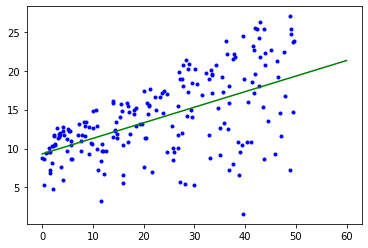

In [ ]:
# Plot the data points and the optimal regression line.
plt.plot(data['radio'], data['sales'], 'b.')
x_coordinates = np.array([0,60]) # since np.max(data['radio']) = 49.6
y_coordinates = x_coordinates * 0.20 + 9.31
plt.plot(x_coordinates, y_coordinates, 'g-')

3. Use `sklearn` to build the same model. Verify that the parameters values are the same as those from the normal equation.

In [ ]:
# Train a linear regression model using sklearn
from sklearn.linear_model import LinearRegression
model_lr = LinearRegression()
model_lr.fit(data[['radio']], data[['sales']])

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
# The coef_ and intercept_ attributes contain parameter values
print(model_lr.intercept_)
print(model_lr.coef_)

[9.3116381]
[[0.20249578]]


In [ ]:
# From the above, the parameters are the same as those from the normal equation.